In [1]:
# ! pip install arch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.covariance import MinCovDet
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import t, f, chi2
%matplotlib inline

$\textbf{Empirical Exercise-Week 9}$  Econometric analysis of stock market dynamics. File: shanghai.csv. Text:p. 632, 14.36  We also show how to import data from Yahoo.  We also compare the GARCH conditional volatility estimate with the VIX, a measure of the stock-price volatility obtained from 30-day moving averages. 

In [2]:
Tab1 = pd.read_csv('shanghai.csv')

In [3]:
date1 = np.array(Tab1.iloc[:,0]); returns = np.array(Tab1.iloc[:,1])
date1

array(['7/7/1995', '7/10/1995', '7/11/1995', ..., '4/30/2015', '5/4/2015',
       '5/5/2015'], dtype=object)

In [4]:
print(returns.shape)

(5064,)


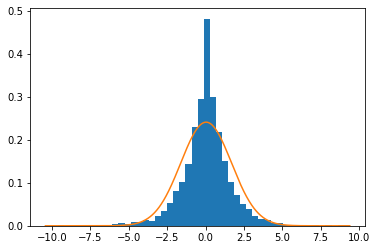

In [5]:
from scipy.stats import norm
plt.hist(returns,density=True,bins=50)
minr=min(returns)
maxr=max(returns)
xarray=np.linspace(minr,maxr,len(returns))
yarray=norm.pdf(xarray,np.mean(returns),np.std(returns,ddof=1))
plt.plot(xarray,yarray)

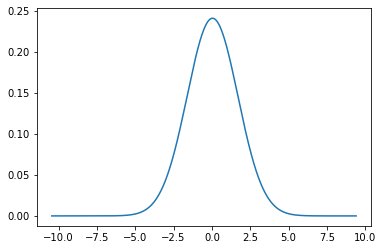

In [6]:
xarray=np.linspace(minr,maxr,len(returns))
yarray=norm.pdf(xarray,np.mean(returns),np.std(returns,ddof=1))
plt.plot(xarray,yarray)

Notice the excess kurtosis and fat tails (skewness)

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

x = date1;
y = returns;





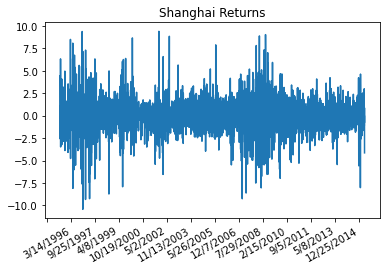

In [8]:
fig, ax = plt.subplots()
ax.plot(date1, returns)
# Rotate and align the tick labels so they look better.
fig.autofmt_xdate()
# Use a more precise date string for the x axis locations in the toolbar.
ax.fmt_xdata = mdates.DateFormatter('%d-%m-%Y')
ax.set_title('Shanghai Returns')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))
plt.show()

In [9]:
from scipy import stats
[jbvalue, pval]= stats.jarque_bera(returns)

In [10]:
[jbvalue, pval] #jbvalue is the test statistic

[5586.516034875546, 0.0]

Reject normality hypothesis for returns.

Since Python doesn't have corresponding arch models as Matlab. The Matlab notebook is better for reference.

In [11]:
from arch import arch_model
help(arch_model)


Help on function arch_model in module arch.univariate.mean:

arch_model(y: 'Optional[ArrayLike]', x: 'Optional[ArrayLike]' = None, mean: "Literal['Constant', 'Zero', 'LS', 'AR', 'ARX', 'HAR', 'HARX', 'constant', 'zero']" = 'Constant', lags: 'Union[None, int, List[int], Int32Array, Int64Array]' = 0, vol: "Literal['GARCH', 'ARCH', 'EGARCH', 'FIARCH', 'APARCH', 'HARCH']" = 'GARCH', p: 'Union[int, List[int]]' = 1, o: 'int' = 0, q: 'int' = 1, power: 'float' = 2.0, dist: "Literal['normal', 'gaussian', 't', 'studentst', 'skewstudent', 'skewt', 'ged', 'generalized error']" = 'normal', hold_back: 'Optional[int]' = None, rescale: 'Optional[bool]' = None) -> 'HARX'
    Initialization of common ARCH model specifications
    
    Parameters
    ----------
    y : {ndarray, Series, None}
        The dependent variable
    x : {np.array, DataFrame}, optional
        Exogenous regressors.  Ignored if model does not permit exogenous
        regressors.
    mean : str, optional
        Name of the mean 

In [12]:
EstMdl = arch_model(returns, vol='Garch', p=1,q=1).fit()
EstMdl.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 32381.622155458615
Iteration:      2,   Func. Count:     16,   Neg. LLF: 29038.470803727912
Iteration:      3,   Func. Count:     25,   Neg. LLF: 1188856629.2200818
Iteration:      4,   Func. Count:     31,   Neg. LLF: 9255.206929600788
Iteration:      5,   Func. Count:     37,   Neg. LLF: 9262.432124742589
Iteration:      6,   Func. Count:     43,   Neg. LLF: 9194.482593126875
Iteration:      7,   Func. Count:     49,   Neg. LLF: 9163.004360897581
Iteration:      8,   Func. Count:     55,   Neg. LLF: 13858.176930865002
Iteration:      9,   Func. Count:     62,   Neg. LLF: 9162.534582551038
Iteration:     10,   Func. Count:     68,   Neg. LLF: 9147.65289921025
Iteration:     11,   Func. Count:     74,   Neg. LLF: 9147.676002775028
Iteration:     12,   Func. Count:     80,   Neg. LLF: 9147.552631628649
Iteration:     13,   Func. Count:     85,   Neg. LLF: 9147.552591604866
Iteration:     14,   Func. Count:     90,   Neg. LLF: 9147.55

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -9147.55
Distribution:                  Normal   AIC:                           18303.1
Method:            Maximum Likelihood   BIC:                           18329.2
                                        No. Observations:                 5064
Date:                Thu, Mar 17 2022   Df Residuals:                     5063
Time:                        11:32:48   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0270  1.977e-02      1.366      0.172 [-1.175e-02,6.575e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0274  1.225e-02      2.237  2.531e-02 [3.390e-03,5.141e-02]
alpha[1]       0.0618  1.387e-02      4.454  8.446e-06 [3.459e-02,8.896e-02]
beta[1]        0.9295  1.739e-02     53.463      0.000     [  0.895,  0.964]
============================================================================

Covariance estimator: robust
"""

C:\Users\mcnel\anaconda4\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


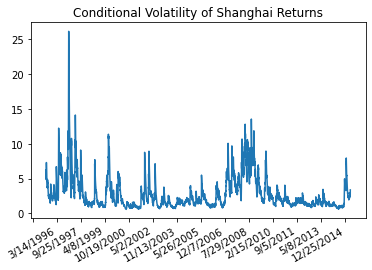

In [13]:
forecasts = EstMdl.forecast(start = 0, method='simulation')
#forecasts.variance.plot()
hh = forecasts.variance;
fig, ax = plt.subplots()
ax.plot(date1, hh)
fig.autofmt_xdate()
# Use a more precise date string for the x axis locations in the toolbar.
ax.fmt_xdata = mdates.DateFormatter('%d-%m-%Y')
ax.set_title('Conditional Volatility of Shanghai Returns')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))
plt.show()

In [87]:
EstMdl2 = arch_model(returns, p=1, q=1, o=1, vol='Garch').fit()
EstMdl2.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 31712.297370567278
Iteration:      2,   Func. Count:     17,   Neg. LLF: 10730182.61193074
Iteration:      3,   Func. Count:     25,   Neg. LLF: 11045.933674565247
Iteration:      4,   Func. Count:     34,   Neg. LLF: 11880.965670557849
Iteration:      5,   Func. Count:     41,   Neg. LLF: 9435.615701507068
Iteration:      6,   Func. Count:     48,   Neg. LLF: 10144.985066956535
Iteration:      7,   Func. Count:     55,   Neg. LLF: 9154.99290054631
Iteration:      8,   Func. Count:     62,   Neg. LLF: 9709.563531768927
Iteration:      9,   Func. Count:     70,   Neg. LLF: 9157.415868804484
Iteration:     10,   Func. Count:     77,   Neg. LLF: 9152.210409910536
Iteration:     11,   Func. Count:     84,   Neg. LLF: 9145.187012548822
Iteration:     12,   Func. Count:     90,   Neg. LLF: 9145.186637046203
Iteration:     13,   Func. Count:     96,   Neg. LLF: 9145.186588521497
Iteration:     14,   Func. Count:    102,   Neg. LLF: 9145.18

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -9145.19
Distribution:                  Normal   AIC:                           18300.4
Method:            Maximum Likelihood   BIC:                           18333.0
                                        No. Observations:                 5064
Date:                Tue, Mar 15 2022   Df Residuals:                     5063
Time:                        20:39:05   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0192  1.962e-02      0.977      0.329 [-1.929e-02,5.760e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0274  1.203e-02      2.279  2.268e-02  [3.837e-03,5.100e-02]
alpha[1]       0.0540  1.249e-02      4.321  1.555e-05  [2.949e-02,7.845e-02]
gamma[1]       0.0153  1.102e-02      1.384      0.166 [-6.348e-03,3.686e-02]
beta[1]        0.9296  1.689e-02     55.033      0.000      [  0.896,  0.963]
=============================================================================

Covariance estimator: robust
"""

C:\Users\mcnel\anaconda4\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


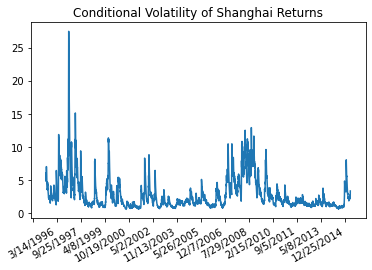

In [88]:
forecasts2 = EstMdl2.forecast(start = 0, method='simulation')
hh2 = forecasts2.variance
fig, ax = plt.subplots()
ax.plot(date1, hh2)
fig.autofmt_xdate()
# Use a more precise date string for the x axis locations in the toolbar.
ax.fmt_xdata = mdates.DateFormatter('%d-%m-%Y')
ax.set_title('Conditional Volatility of Shanghai Returns')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))
plt.show()

#plt.plot(range(5064), forecasts.variance)
#plt.plot(range(5064), forecasts2.variance)
#plt.show()

Confidence intervals under the two estimates

In [14]:
V = forecasts.variance
V2 = forecasts2.variance
ymean1 = np.mean(returns) - 1.96 * V**0.5
ymean2 = np.mean(returns) + 1.96 * V**0.5
plt.figure(figsize=(16,8))
plt.plot(date1, ymean1)
plt.plot(date1, ymean2)
plt.plot(date1, returns)
ax.fmt_xdata = mdates.DateFormatter('%d-%m-%Y')
plt.title('Confidence Interval on Expected Returns for GARCH(1,1)')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))
fig.autofmt_xdate()
plt.show()






NameError: name 'forecasts2' is not defined

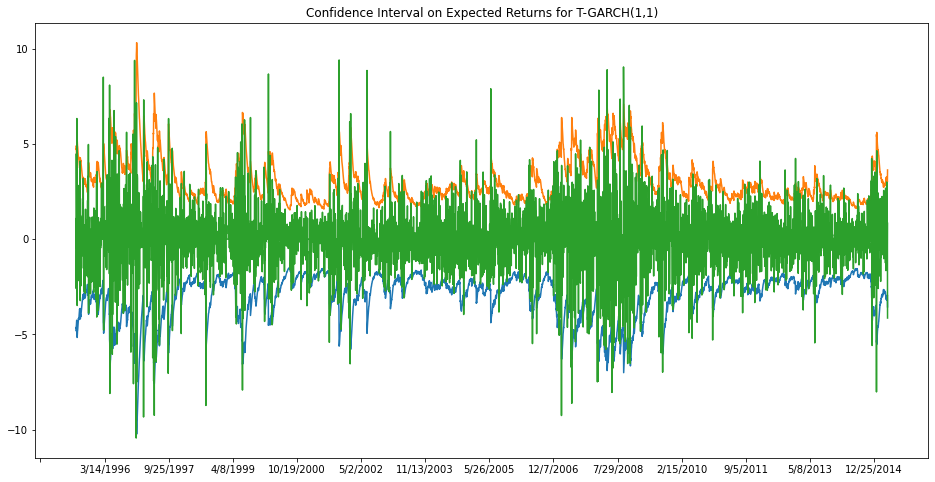

In [104]:
ymean1 = np.mean(returns) - 1.96 * V2**0.5
ymean2 = np.mean(returns) + 1.96 * V2**0.5
plt.figure(figsize=(16,8))
plt.plot(date1, ymean1)
plt.plot(date1, ymean2)
plt.plot(date1, returns)
ax.fmt_xdata = mdates.DateFormatter('%d-%m-%Y')
plt.title('Confidence Interval on Expected Returns for T-GARCH(1,1)')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))
fig.autofmt_xdate()
plt.show()

In [25]:
! pip install yfinance
import yfinance as yf
SPX = yf.download('^GSPC', start = '2000-01-01', interval = '1d')  # S&P 500
CAC = yf.download('^FCHI', start = '2000-01-01', interval = '1d')  # Paris Exchange
VIX = yf.download('^VIX', start = '2000-01-01', interval = '1d')   # VIX

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [16]:
SPX

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2022-03-11,4279.500000,4291.009766,4200.490234,4204.310059,4204.310059,3877430000
2022-03-14,4202.750000,4247.569824,4161.720215,4173.109863,4173.109863,4757600000
2022-03-15,4188.819824,4271.049805,4187.899902,4262.450195,4262.450195,4331170000


In [17]:
SPX_date= SPX.index.to_frame().reset_index(drop=True)
SPXclose = SPX.iloc[:,4]
SPXreturn =np.log(SPXclose) - np.log(SPXclose).shift(1)
SPXreturn.replace([np.inf, -np.inf], np.nan, inplace=True)
SPXreturn.fillna(0)
SPXreturn.replace(np.nan, 0)
#SPXreturn = np.array(SPXreturn);
np.mean(SPXreturn)


0.00019641612935709574

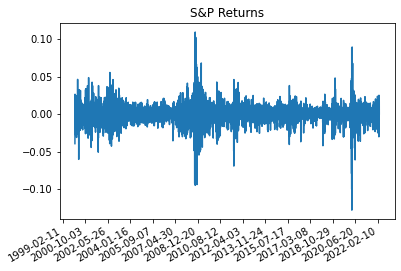

In [18]:
fig, ax = plt.subplots()
ax.plot(SPX_date, SPXreturn)
# Rotate and align the tick labels so they look better.
fig.autofmt_xdate()
# Use a more precise date string for the x axis locations in the toolbar.
ax.fmt_xdata = mdates.DateFormatter('%d-%m-%Y')
ax.set_title('S&P Returns')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=600))
plt.show()

In [19]:
np.mean(SPXreturn)

SPXreturn1 = np.array(SPXreturn)
SPXreturn1 = np.delete(SPXreturn1,0,0)
SPXreturn1

array([-0.03909918,  0.00192034,  0.00095522, ...,  0.02118263,
        0.02213692,  0.00055291])

In [43]:
EstMdl3 = arch_model(SPXreturn1*100, vol='Garch', p=1,q=1).fit()
EstMdl3.summary()


Iteration:      1,   Func. Count:      6,   Neg. LLF: 1412024599.317903
Iteration:      2,   Func. Count:     15,   Neg. LLF: 3117367552.0716796
Iteration:      3,   Func. Count:     22,   Neg. LLF: 10851.996801317055
Iteration:      4,   Func. Count:     29,   Neg. LLF: 7844.7253920676085
Iteration:      5,   Func. Count:     35,   Neg. LLF: 7737.327977992064
Iteration:      6,   Func. Count:     41,   Neg. LLF: 8520.783229611185
Iteration:      7,   Func. Count:     47,   Neg. LLF: 7697.384558121674
Iteration:      8,   Func. Count:     53,   Neg. LLF: 7676.483878493521
Iteration:      9,   Func. Count:     58,   Neg. LLF: 7676.450552699447
Iteration:     10,   Func. Count:     63,   Neg. LLF: 7676.449452761302
Iteration:     11,   Func. Count:     68,   Neg. LLF: 7676.449437241952
Iteration:     12,   Func. Count:     72,   Neg. LLF: 7676.449437242739
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7676.449437241952
            Iterations: 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7676.45
Distribution:                  Normal   AIC:                           15360.9
Method:            Maximum Likelihood   BIC:                           15387.4
                                        No. Observations:                 5587
Date:                Thu, Mar 17 2022   Df Residuals:                     5586
Time:                        12:19:57   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0600  1.082e-02      5.545  2.938e-08 [3.878e-02,8.118e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0241  5.057e-03      4.765  1.892e-06 [1.418e-02,3.400e-02]
alpha[1]       0.1259  1.323e-02      9.520  1.734e-21     [  0.100,  0.152]
beta[1]        0.8570  1.357e-02     63.173      0.000     [  0.830,  0.884]
============================================================================

Covariance estimator: robust
"""

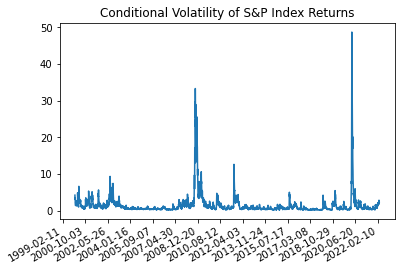

In [45]:
forecasts3 = EstMdl3.forecast(start = 0, method='simulation')
hh3 = forecasts3.variance
fig, ax = plt.subplots()
SPX_date = np.array(SPX_date)
SPX_date1 = np.delete(SPX_date,0,0)
SPX_date1 = np.array(SPX_date1)
ax.plot(SPX_date1, hh3)
fig.autofmt_xdate()
# Use a more precise date string for the x axis locations in the toolbar.
ax.fmt_xdata = mdates.DateFormatter('%d-%m-%Y')
ax.set_title('Conditional Volatility of S&P Index Returns')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=600))
plt.show()

Text(0.5, 1.0, 'GARCH(1,1) process for S&P and VIX')

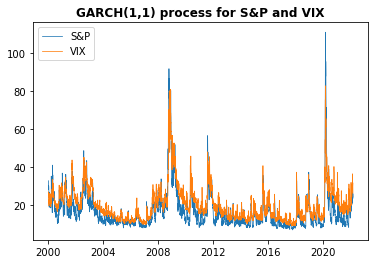

In [46]:
# Transforming data to pandas dataframe
    # + Annualizing volatilities
    # + Indexing by date
hh3=  np.sqrt(hh3*252)
hh4= pd.DataFrame(hh3)
index = SPX.index[1:]
# Plotting the data
len(hh3)
len(index)
plt.plot(index, hh4, label = 'S&P', linewidth=.75)
plt.plot(VIX.Close, label = 'VIX', linewidth = .75)
plt.legend()
plt.title('GARCH(1,1) process for S&P and VIX', fontweight = 'bold')


